In [339]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

#displays your plot in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [340]:
US_Mass_Shootings = pd.read_csv('US_Mass_Shootings1982-2018.csv')

### This Dataset is from the Mother Jones website, on US mass shootings from 1982-2018, with a couple from 2019. A shooting is considered to be a mass shooting if 3 or more people die.
https://www.motherjones.com/politics/2012/12/mass-shootings-mother-jones-full-data/

In [341]:
US_Mass_Shootings.shape

(109, 24)

In [342]:
US_Mass_Shootings

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,weapon_details,race,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type,year
0,Pennsylvania hotel bar shooting,"State College, PA",1/24/19,"Jordan Witmer, 21, shot three people at a Rama...",3,1,4,Other,21,-,...,-,White,M,http://www.wistv.com/2019/01/26/details-emerge...,-,-,40.785142,-77.839411,Spree,2019
1,SunTrust bank shooting,"Sebring, FL",1/23/19,"Zephen A. Xaver, 21, fatally shot five women i...",5,0,5,Workplace,21,Yes,...,9 mm handgun,White,M,https://wsbt.com/news/local/classmate-says-flo...,https://wsbt.com/news/local/classmate-says-flo...,-,27.471043,-81.458470,Mass,2019
2,Mercy Hospital shooting,"Chicago, IL",11/19/18,"Juan Lopez, 32, reportedly confronted his form...",3,0,3,Workplace,32,-,...,9mm handgun,Latino,M,https://www.cnn.com/2018/11/19/us/mercy-hospit...,-,-,41.847667,-87.622009,Mass,2018
3,Thousand Oaks nightclub shooting,"Thousand Oaks, CA",11/7/18,"Ian David Long, 28, dressed in black and armed...",12,22,34,Other,28,Yes,...,"Glock 21, .45 caliber; high-capacity magazine",NaN,M,http://www.latimes.com/local/lanow/la-me-ln-th...,http://www.latimes.com/local/lanow/la-me-ln-th...,-,34.176946,-118.874793,Mass,2018
4,Tree of Life synagogue shooting,"Pittsburgh, PA",10/27/18,"Robert D. Bowers, 46, shouted anti-Semitic slu...",11,6,17,Religious,46,-,...,AR-15; Glock .357 (3),White,M,https://www.nytimes.com/2018/10/27/us/active-s...,-,-,40.443898,-79.921398,Mass,2018
5,Rite Aid warehouse shooting,"Perryman, MD",9/20/18,"Snochia Moseley, 26, reportedly a disgruntled ...",3,3,6,Workplace,26,-,...,Glock 9 mm,Black,F,http://www.baltimoresun.com/news/maryland/crim...,-,-,39.455658,-76.208485,Mass,2018
6,T&T Trucking shooting,"Bakersfield, CA",9/12/18,"Javier Casarez, 54, who was going through a bi...",5,0,5,Workplace,54,-,...,Smith & Wesson Model 500 (.50-caliber revolver),Latino,M,http://www.latimes.com/local/lanow/la-me-baker...,-,-,35.349388,-118.916335,Spree,2018
7,Fifth Third Center shooting,"Cincinnati, OH",9/6/18,"Omar Enrique Santa Perez, 29, walked into the ...",3,2,5,Workplace,29,Yes,...,9mm handgun,Latino,M,https://www.cnn.com/2018/09/07/us/cincinnati-s...,-,-,39.101981,-84.511782,Mass,2018
8,Capital Gazette shooting,"Annapolis, MD",6/28/18,"Jarrod W. Ramos, 38, shot through the glass do...",5,2,7,Workplace,38,-,...,12-gauge pump-action shotgun,White,M,http://www.capitalgazette.com/news/annapolis/b...,-,-,38.994548,-76.543657,Mass,2018
9,Santa Fe High School shooting,"Santa Fe, TX",5/18/18,"Dimitrios Pagourtzis, a 17-year-old student, o...",10,13,23,School,17,-,...,-,White,M,https://www.chron.com/news/houston-texas/artic...,-,https://www.chron.com/news/houston-texas/artic...,29.392825,-95.141972,Mass,2018


In [343]:
US_Mass_Shootings = US_Mass_Shootings.rename(columns = {'case': 'Case', 'location': 'Location', 'date':'Date','year':'Year', 'fatalities':'Fatalities', 'injured':'Injured', 'total_victims':'Total victims','location.1':'Venue', 'summary': 'Summary', 'age_of_shooter': 'Age','race':'Race', 'gender':'Gender','longitude': 'Longitude','latitude':'Latitude'})

In [344]:
US_Mass_Shootings_select_columns = US_Mass_Shootings.loc[:,['Case','Location','Summary','Age','Date','Year','Fatalities','Injured','Total victims','Venue','Race','Gender','Latitude','Longitude']]

In [345]:
US_Mass_Shootings_select_columns

,Case,Location,Summary,Age,Date,Year,Fatalities,Injured,Total victims,Venue,Race,Gender,Latitude,Longitude
0,Pennsylvania hotel bar shooting,"State College, PA","Jordan Witmer, 21, shot three people at a Rama...",21,1/24/19,2019,3,1,4,Other,White,M,40.785142,-77.839411
1,SunTrust bank shooting,"Sebring, FL","Zephen A. Xaver, 21, fatally shot five women i...",21,1/23/19,2019,5,0,5,Workplace,White,M,27.471043,-81.458470
2,Mercy Hospital shooting,"Chicago, IL","Juan Lopez, 32, reportedly confronted his form...",32,11/19/18,2018,3,0,3,Workplace,Latino,M,41.847667,-87.622009
3,Thousand Oaks nightclub shooting,"Thousand Oaks, CA","Ian David Long, 28, dressed in black and armed...",28,11/7/18,2018,12,22,34,Other,NaN,M,34.176946,-118.874793
4,Tree of Life synagogue shooting,"Pittsburgh, PA","Robert D. Bowers, 46, shouted anti-Semitic slu...",46,10/27/18,2018,11,6,17,Religious,White,M,40.443898,-79.921398
5,Rite Aid warehouse shooting,"Perryman, MD","Snochia Moseley, 26, reportedly a disgruntled ...",26,9/20/18,2018,3,3,6,Workplace,Black,F,39.455658,-76.208485
6,T&T Trucking shooting,"Bakersfield, CA","Javier Casarez, 54, who was going through a bi...",54,9/12/18,2018,5,0,5,Workplace,Latino,M,35.349388,-118.916335
7,Fifth Third Center shooting,"Cincinnati, OH","Omar Enrique Santa Perez, 29, walked into the ...",29,9/6/18,2018,3,2,5,Workplace,Latino,M,39.101981,-84.511782
8,Capital Gazette shooting,"Annapolis, MD","Jarrod W. Ramos, 38, shot through the glass do...",38,6/28/18,2018,5,2,7,Workplace,White,M,38.994548,-76.543657
9,Santa Fe High School shooting,"Santa Fe, TX","Dimitrios Pagourtzis, a 17-year-old student, o...",17,5/18/18,2018,10,13,23,School,White,M,29.392825,-95.141972


In [346]:
US_Mass_Shootings_select_columns.shape

(109, 14)

In [347]:
Shootings = US_Mass_Shootings_select_columns

In [348]:
#Replaces Male with M, Male & Female with M & F, and Female with F in the Gender column
Shootings['Gender'].replace(['Male','Male & Female', 'Female'],['M', 'M&F','F'], inplace=True)
Shootings['Race'].replace(['white',' White', 'White ','black','NaN','-','unclear'],['White', 'White','White', 'Black', 'Unclear','Unclear','Unclear'], inplace=True)
Shootings['Venue'].replace(['Other ',' Other','Other\n','\nWorkplace'],['Other','Other','Other','Workplace'], inplace=True)

In [349]:
pd.set_option('display.max_rows',None)
Shootings

,Case,Location,Summary,Age,Date,Year,Fatalities,Injured,Total victims,Venue,Race,Gender,Latitude,Longitude
0,Pennsylvania hotel bar shooting,"State College, PA","Jordan Witmer, 21, shot three people at a Rama...",21,1/24/19,2019,3,1,4,Other,White,M,40.785142,-77.839411
1,SunTrust bank shooting,"Sebring, FL","Zephen A. Xaver, 21, fatally shot five women i...",21,1/23/19,2019,5,0,5,Workplace,White,M,27.471043,-81.458470
2,Mercy Hospital shooting,"Chicago, IL","Juan Lopez, 32, reportedly confronted his form...",32,11/19/18,2018,3,0,3,Workplace,Latino,M,41.847667,-87.622009
3,Thousand Oaks nightclub shooting,"Thousand Oaks, CA","Ian David Long, 28, dressed in black and armed...",28,11/7/18,2018,12,22,34,Other,NaN,M,34.176946,-118.874793
4,Tree of Life synagogue shooting,"Pittsburgh, PA","Robert D. Bowers, 46, shouted anti-Semitic slu...",46,10/27/18,2018,11,6,17,Religious,White,M,40.443898,-79.921398
5,Rite Aid warehouse shooting,"Perryman, MD","Snochia Moseley, 26, reportedly a disgruntled ...",26,9/20/18,2018,3,3,6,Workplace,Black,F,39.455658,-76.208485
6,T&T Trucking shooting,"Bakersfield, CA","Javier Casarez, 54, who was going through a bi...",54,9/12/18,2018,5,0,5,Workplace,Latino,M,35.349388,-118.916335
7,Fifth Third Center shooting,"Cincinnati, OH","Omar Enrique Santa Perez, 29, walked into the ...",29,9/6/18,2018,3,2,5,Workplace,Latino,M,39.101981,-84.511782
8,Capital Gazette shooting,"Annapolis, MD","Jarrod W. Ramos, 38, shot through the glass do...",38,6/28/18,2018,5,2,7,Workplace,White,M,38.994548,-76.543657
9,Santa Fe High School shooting,"Santa Fe, TX","Dimitrios Pagourtzis, a 17-year-old student, o...",17,5/18/18,2018,10,13,23,School,White,M,29.392825,-95.141972


In [350]:
gender =Shootings.groupby('Gender').Gender.agg(['count']).sort_values('count', ascending = False)
gender

,count
Gender,
M,105
F,3
M&F,1


In [351]:
gender =Shootings['Gender'].value_counts()

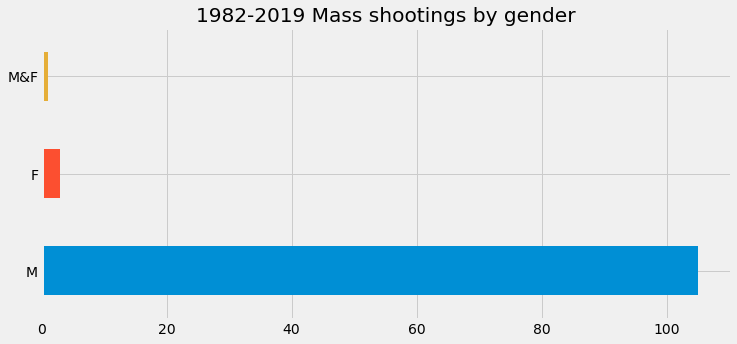

In [352]:
# plots the mass shootings by gender
gender.plot.barh(figsize=(11,5))
plt.title('1982-2019 Mass shootings by gender')

In [353]:
race = Shootings.groupby('Race').Race.agg(['count']).sort_values('count', ascending = False)
race

,count
Race,
White,62
Black,17
Latino,10
Asian,8
Other,5
Native American,3
Unclear,3


In [354]:
race =Shootings['Race'].value_counts()
race

White              62
Black              17
Latino             10
Asian               8
Other               5
Native American     3
Unclear             3
Name: Race, dtype: int64

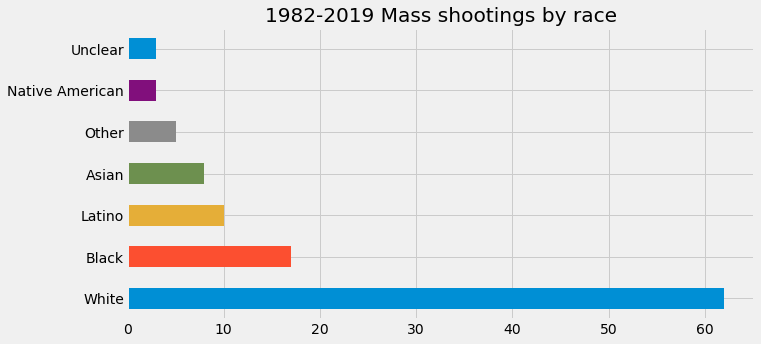

In [355]:
# plots the mass shootings by race
race.plot.barh(figsize=(10,5))
plt.title('1982-2019 Mass shootings by race')

In [356]:
venue = Shootings.groupby('Venue').Venue.agg(['count']).sort_values('count', ascending = False)
venue

,count
Venue,
Other,45
Workplace,35
School,17
Religious,6
Military,5
Airport,1


In [357]:
venue =Shootings['Venue'].value_counts()

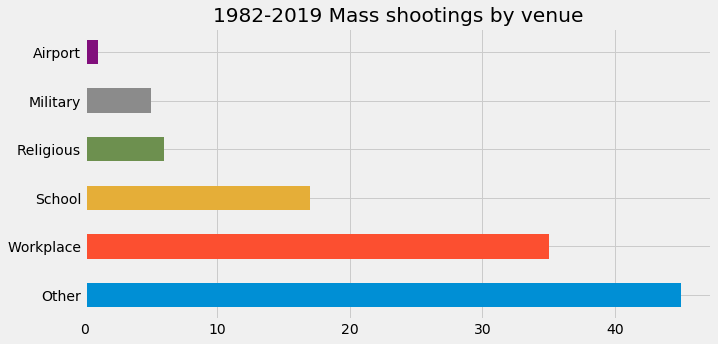

In [358]:
# plots the mass shootings by venue
venue.plot.barh(figsize=(10,5))
plt.title('1982-2019 Mass shootings by venue')

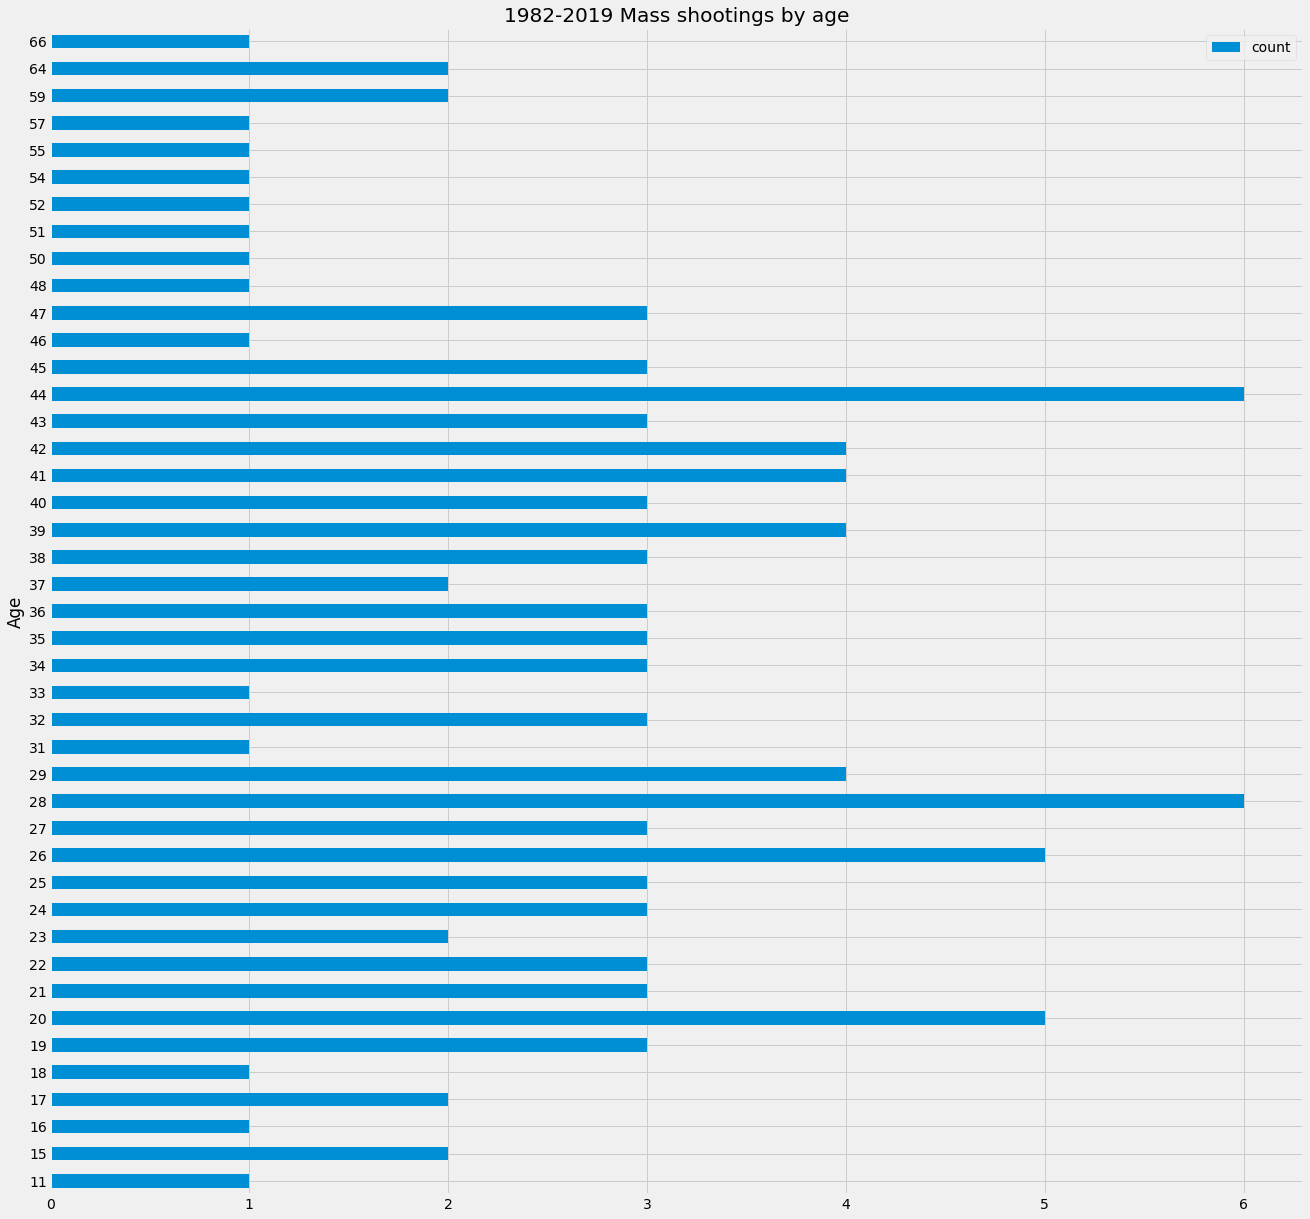

In [359]:
# plots the mass shootings by age
age = Shootings.groupby('Age').Age.agg(['count'])
age.plot.barh(figsize=(20,20))
plt.title('1982-2019 Mass shootings by age')

In [360]:
#import seaborn as sns

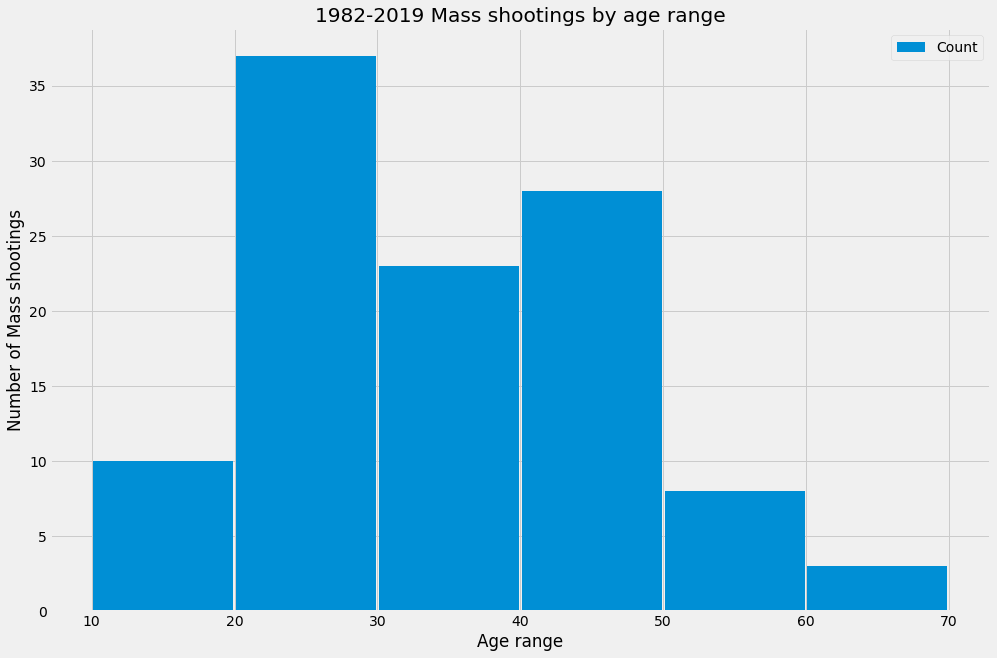

In [361]:
#sns.set()
Age = Shootings['Age']
plt.figure(figsize = (15,10))
plt.xlabel('Age range')
plt.ylabel('Number of Mass shootings')
plt.title('1982-2019 Mass shootings by age range')
plt.hist(Age, bins = [10,20,30,40,50,60,70], rwidth = .98, label = 'Count')
plt.legend()



### Between 1982-2018, the year 2018 had the most mass shootings, with a count of 12

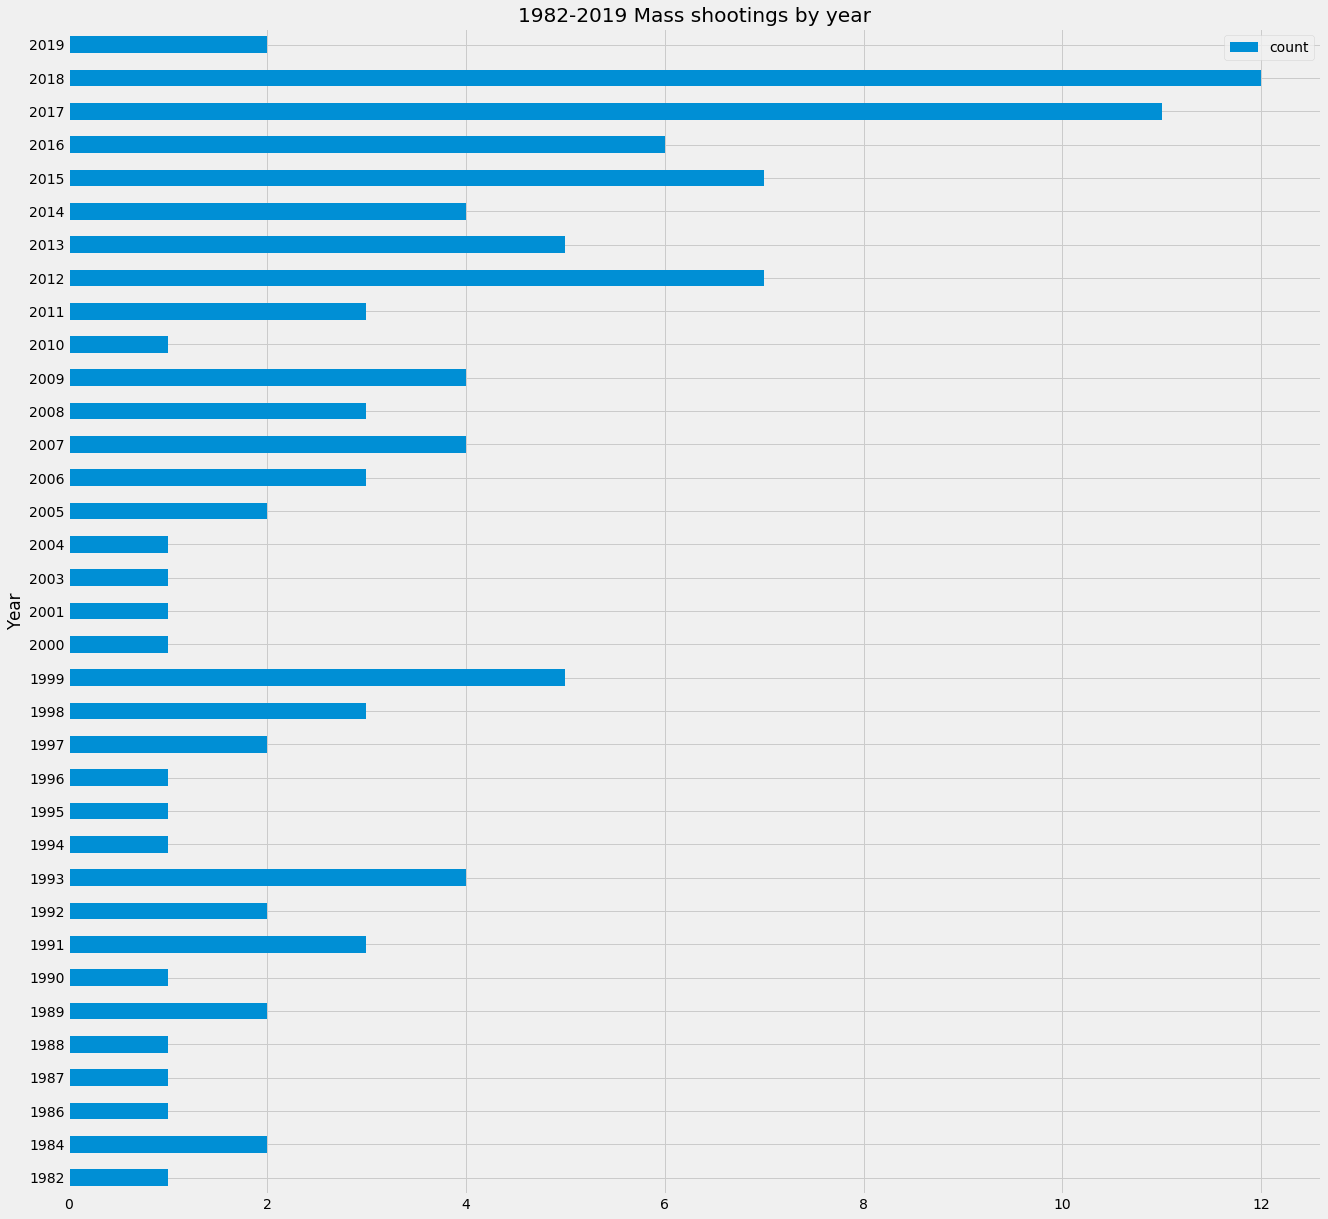

In [362]:
# plots the mass shootings by year 
year = Shootings.groupby('Year').Year.agg(['count'])
year.plot.barh(figsize=(20,20))
plt.title('1982-2019 Mass shootings by year')

## Let's explore 2018 a little more

In [363]:
year_2018 = Shootings[Shootings.Year == 2018]
venue_2018 = year_2018.groupby('Venue').Venue.agg(['count']).sort_values('count', ascending = False)
venue_2018

,count
Venue,
Workplace,6
Other,3
School,2
Religious,1


In [364]:
venue_2018 =year_2018['Venue'].value_counts()

## It looks like the majority of the shootings happened at the workplace

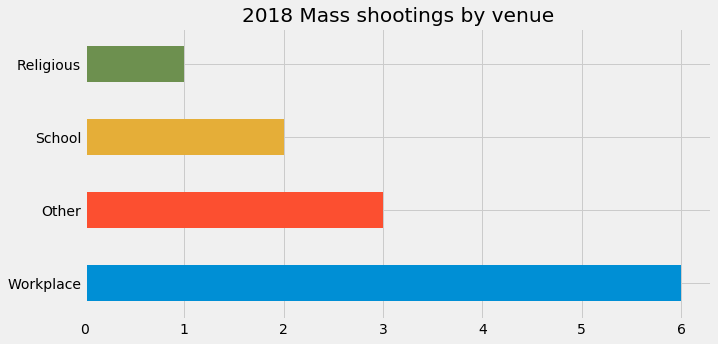

In [365]:
# plots the mass shootings by venue for the year 2018
venue_2018.plot.barh(figsize =(10,5))
plt.title('2018 Mass shootings by venue')

In [366]:
age_2018 = year_2018.groupby('Age').Age.agg(['count'])
age_2018

,count
Age,
17,1
19,1
26,1
28,2
29,2
32,1
36,1
38,1
46,1


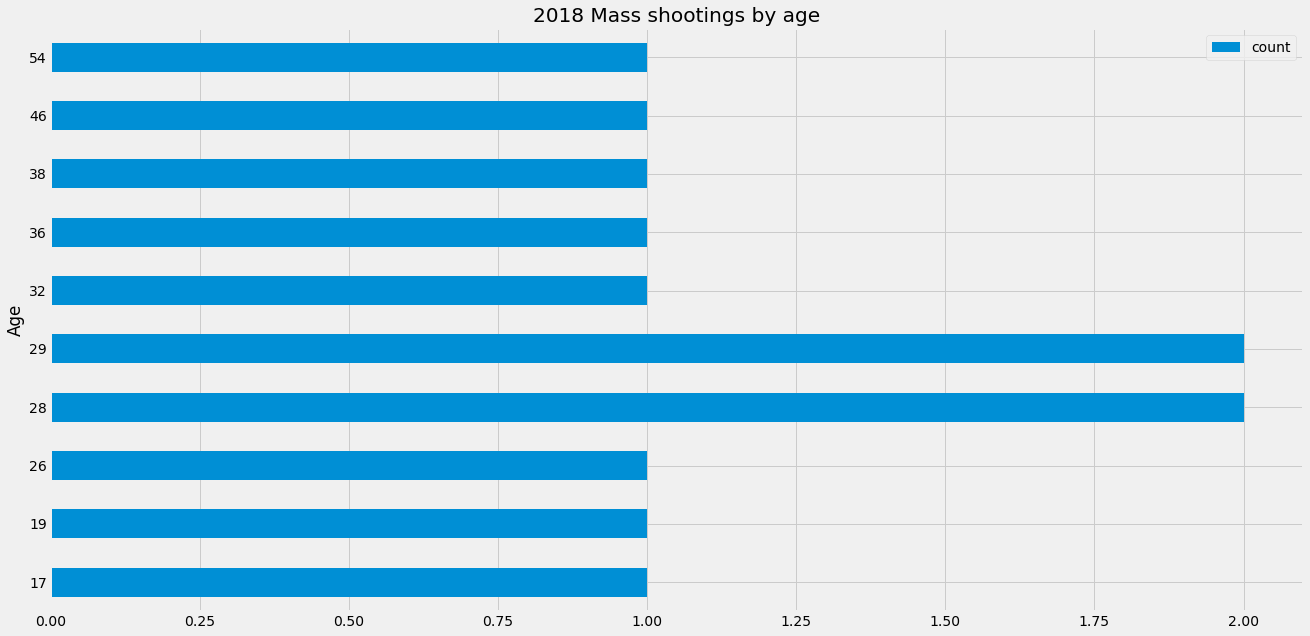

In [367]:
# plots the shootings by age for the year 2018
age_2018.plot.barh(figsize =(20,10))
plt.title('2018 Mass shootings by age')

In [368]:
gender_2018 = year_2018.groupby('Gender').Gender.agg(['count'])

## Eleven of the twelve 2018 mass shootings were by males

In [369]:
gender_2018

,count
Gender,
F,1
M,11


In [370]:
race_2018 = year_2018.groupby('Race').Race.agg(['count'])
race_2018

,count
Race,
Asian,1
Black,1
Latino,3
White,6


In [371]:
race_2018 =year_2018['Race'].value_counts()

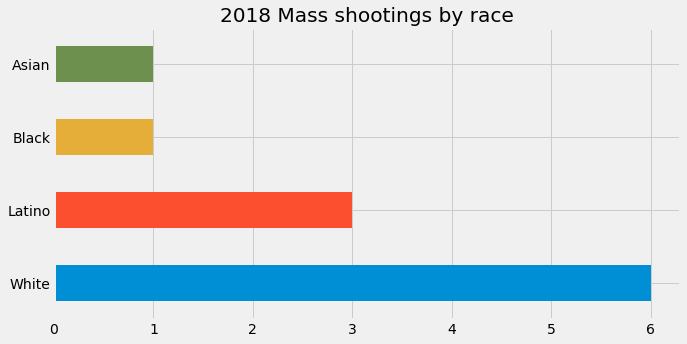

In [372]:
# plots the 2018 shootings by race
race_2018.plot.barh(figsize =(10,5))
plt.title('2018 Mass shootings by race')

In [373]:
import folium

In [374]:
#color=['red','blue','gray','darkred','lightred','orange','beige','green','darkgreen','lightgreen','darkblue','lightblue',
    #'purple','darkpurple','pink','cadetblue','lightgray','black']


In [375]:
# selects the Latitude, Longitude, and Location columns
locations = Shootings.loc[:,['Latitude','Longitude', 'Location']]

In [376]:
# makes an empty map
incident_map = folium.Map(location=[40, -100], zoom_start=3.5)

In [377]:
# adds markers on the map
for i in range(0,len(locations)):
    folium.Marker([locations.iloc[i]['Latitude'], locations.iloc[i]['Longitude']], popup=locations.iloc[i]['Location'], icon=folium.Icon(color='red')).add_to(incident_map)


In [378]:
incident_map

In [379]:
pd.set_option('display.max_rows',None)
loca = Shootings.loc[:,'Location']
loca

0                         State College, PA
1                               Sebring, FL
2                               Chicago, IL
3                         Thousand Oaks, CA
4                            Pittsburgh, PA
5                              Perryman, MD
6                           Bakersfield, CA
7                            Cincinnati, OH
8                             Annapolis, MD
9                              Santa Fe, TX
10                            Nashville, TN
11                           Yountville, CA
12                             Parkland, FL
13                             Melcroft, PA
14                        Rancho Tehama, CA
15                   Sutherland Springs, TX
16                             Thornton, CO
17                             Edgewood, MD
18                            Las Vegas, NV
19                        San Francisco, CA
20                Tunkhannock, Pennsylvania
21                         Orlando, Florida
22                       Kirkers

In [380]:
incident_map.save(outfile='US_Mass_Shootings1982-2019.html')